In [284]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [285]:
df = pd.read_csv("/content/gurgaon_properties_cleaned_v2.csv")

In [286]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ireo victory valley,sector 67,2.95,12110.0,2436.0,Super Built up area 2436(226.31 sq.m.)Built Up...,3,3,3+,...,2436.0,2236.000000,2036.000000,0,1,0,1,0,0,165.0
1,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,...,NaN,1440.000000,NaN,0,1,0,0,0,2,70.0
2,house,emaar mgf marbella,sector 66,NaN,NaN,NaN,Plot area 350(292.64 sq.m.)Built Up area: 6500...,4,4,3+,...,NaN,6500.000000,NaN,1,1,1,1,0,1,136.0
3,house,sobha city,sector 108,10.50,14323.0,7331.0,Built Up area: 7331 (681.07 sq.m.),5,4,3+,...,NaN,7330.969373,NaN,0,0,0,0,0,1,59.0
4,flat,signature global grand iva,sector 103,0.30,8290.0,362.0,Carpet area: 361.88 (33.62 sq.m.),1,2,2,...,NaN,NaN,361.882318,0,0,0,0,0,1,37.0


## Price

<Axes: xlabel='price', ylabel='Count'>

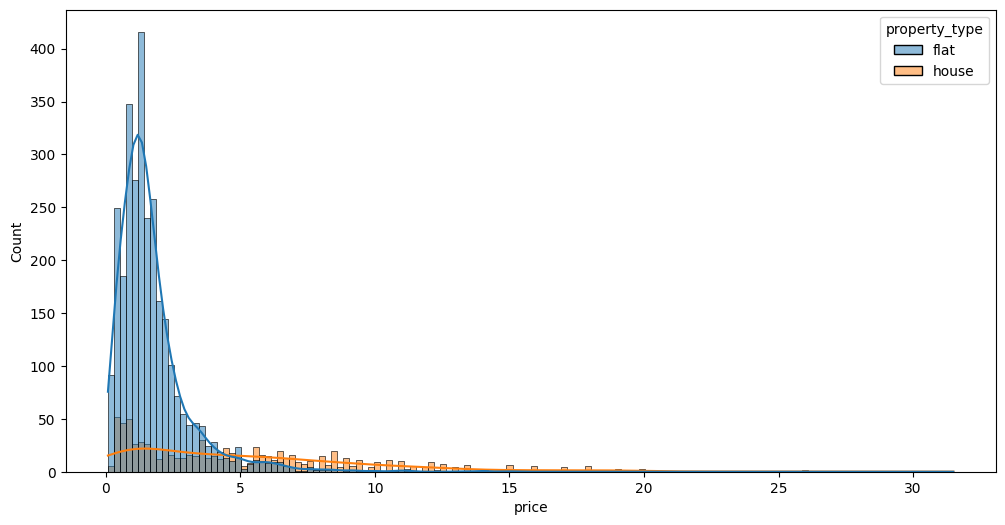

In [287]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x= 'price',kde=True,hue='property_type')

<Axes: xlabel='price'>

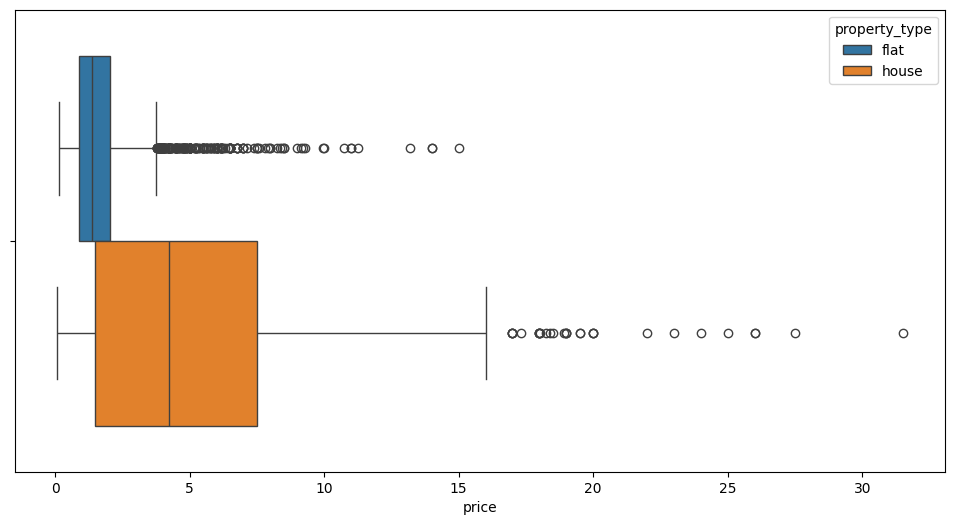

In [288]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x= 'price',hue='property_type')

In [289]:
# Since the distribution is not normally distributed hence we need to use the IQR method for detection
# of outliers

Q3 = df['price'].describe()['75%']
Q1 = df['price'].describe()['25%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(432,
 count    432.000000
 mean       9.196157
 std        4.061291
 min        5.350000
 25%        6.400000
 50%        8.000000
 75%       10.607500
 max       31.500000
 Name: price, dtype: float64)

In [290]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
422,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,...,NaN,9000.0,NaN,1,1,1,1,0,2,74.0
2919,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,0,42.0
1399,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,...,NaN,400.0,350.0,1,1,1,1,0,2,72.0
928,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,...,NaN,4545.0,NaN,1,1,0,1,1,0,138.0
1353,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,...,NaN,1000.0,NaN,1,1,1,1,0,1,0.0
911,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,...,NaN,400.0,NaN,1,1,0,1,0,0,122.0
332,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,...,NaN,9000.0,NaN,1,1,1,1,0,0,145.0
1655,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,...,NaN,1000.0,NaN,0,1,0,0,0,1,54.0
2236,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,...,NaN,4518.0,NaN,1,1,1,1,0,0,153.0
346,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,...,NaN,500.0,NaN,0,1,0,0,0,0,31.0


In [291]:
outliers.to_csv("price_outliers.csv")

## Price per sqft

<Axes: xlabel='price_per_sqft', ylabel='Count'>

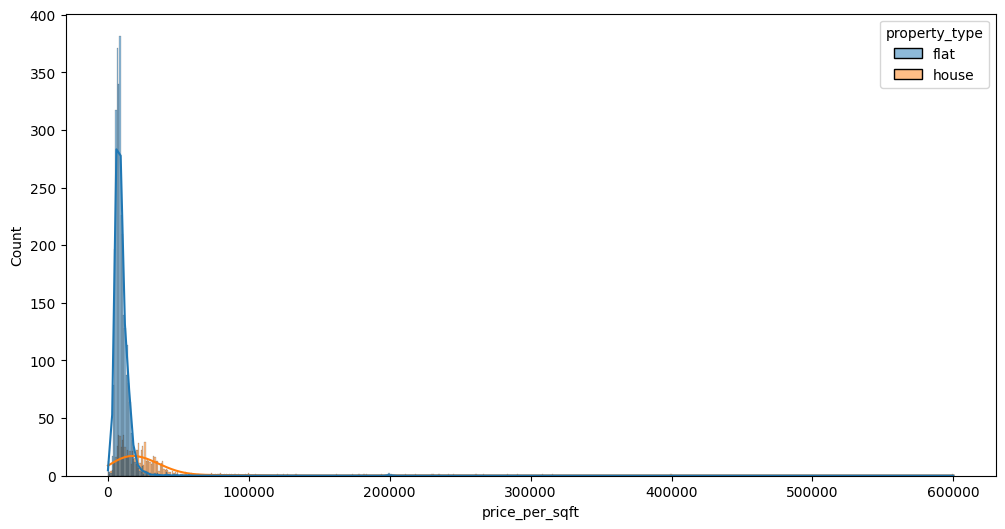

In [292]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x= 'price_per_sqft',kde=True,hue='property_type')

In [293]:
df['price_per_sqft'].describe()

count      3784.000000
mean      13801.172040
std       23054.969362
min           4.000000
25%        6807.500000
50%        9000.000000
75%       13766.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft'>

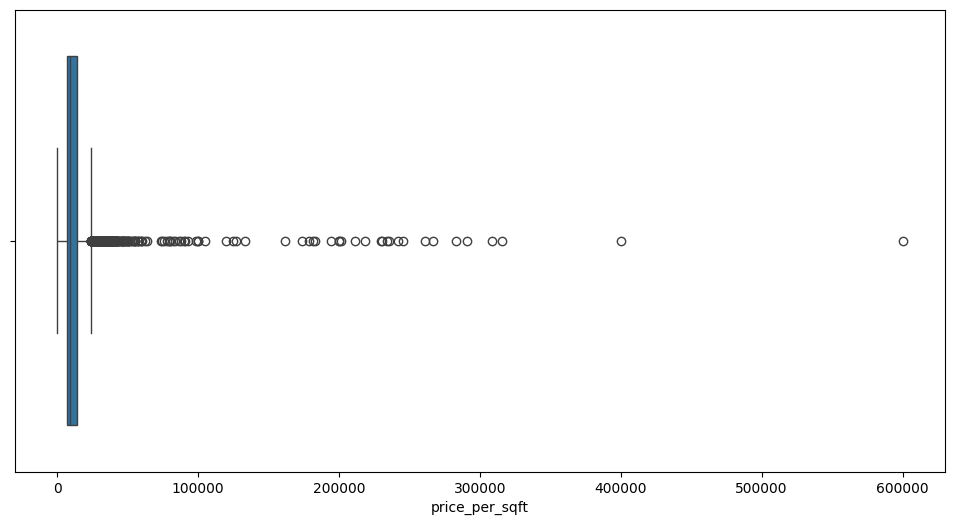

In [294]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x= 'price_per_sqft')

In [295]:
# IQR for price_per_sqft
# Since the distribution is not normally distributed hence we need to use the IQR method for detection
# of outliers

Q3 = df['price_per_sqft'].describe()['75%']
Q1 = df['price_per_sqft'].describe()['25%']
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_psqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

num_outliers = outliers.shape[0]
outliers_price_per_sqft_stats = outliers_psqft['price_per_sqft'].describe()

num_outliers, outliers_price_per_sqft_stats

(432,
 count       366.000000
 mean      52191.702186
 std       60811.786038
 min       24211.000000
 25%       27778.000000
 50%       33333.000000
 75%       41804.000000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [296]:
outliers_psqft.to_csv("price_per_sqft_outliers.csv")

In [297]:
outliers_psqft.sort_values('price_per_sqft',ascending=False).head(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
911,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,...,NaN,400.0,NaN,1,1,0,1,0,0,122.0
139,house,dlf city plots phase 2,sector 25,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),12,12,3+,...,NaN,250.0,NaN,1,1,0,0,0,0,114.0
2664,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,9,6,2,...,NaN,NaN,1600.0,0,0,0,0,0,1,0.0
1094,house,ansal,sector 43,1.85,308333.0,60.0,Plot area 60(5.57 sq.m.),8,8,3+,...,NaN,60.0,NaN,0,0,0,0,0,1,53.0
2231,house,uppal southend,sector 49,6.75,290948.0,232.0,Plot area 232(21.55 sq.m.),12,12,3+,...,NaN,232.0,NaN,1,1,0,1,1,0,49.0
1839,house,unitech nirvana birch court,sector 50,7.10,283333.0,251.0,Plot area 240(22.3 sq.m.),3,3,3,...,NaN,240.0,NaN,0,1,0,0,0,1,49.0
1948,house,independent,sector 57,8.00,266666.0,300.0,Plot area 300(27.87 sq.m.),5,4,3,...,NaN,300.0,NaN,1,1,0,1,0,1,21.0
2769,house,dlf city plots phase 2,sector 25,10.50,261194.0,402.0,Plot area 402(37.35 sq.m.),4,4,2,...,NaN,402.0,NaN,0,1,0,1,0,0,91.0
3365,house,huda plot sector 38,sector 38,4.30,245398.0,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,13,13,3+,...,NaN,145.0,NaN,0,0,0,0,0,2,7.0
2267,house,independent,sector 55,1.45,241666.0,60.0,Plot area 60(5.57 sq.m.),4,4,3+,...,NaN,60.0,NaN,0,0,1,0,0,1,70.0


**Observation** - **So there is a clear discrepancy in area in terms of units all the values in 100's are in square yards or some in sq meters which need to convert to sqft.**

In [298]:
outliers_psqft['area'] = outliers_psqft['area'].apply(lambda x: x*9 if x < 1000 else x)

<ipython-input-298-85aa488f643b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_psqft['area'] = outliers_psqft['area'].apply(lambda x: x*9 if x < 1000 else x)


In [299]:
outliers_psqft['price_per_sqft'] = round((outliers_psqft['price']*10000000)/outliers_psqft['area'])

<ipython-input-299-81327e69061a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_psqft['price_per_sqft'] = round((outliers_psqft['price']*10000000)/outliers_psqft['area'])


In [300]:
outliers_psqft['price_per_sqft'].describe()

count      366.000000
mean     29233.062842
std      12246.917835
min       2723.000000
25%      25105.000000
50%      29630.000000
75%      35491.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [301]:
df.update(outliers_psqft)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

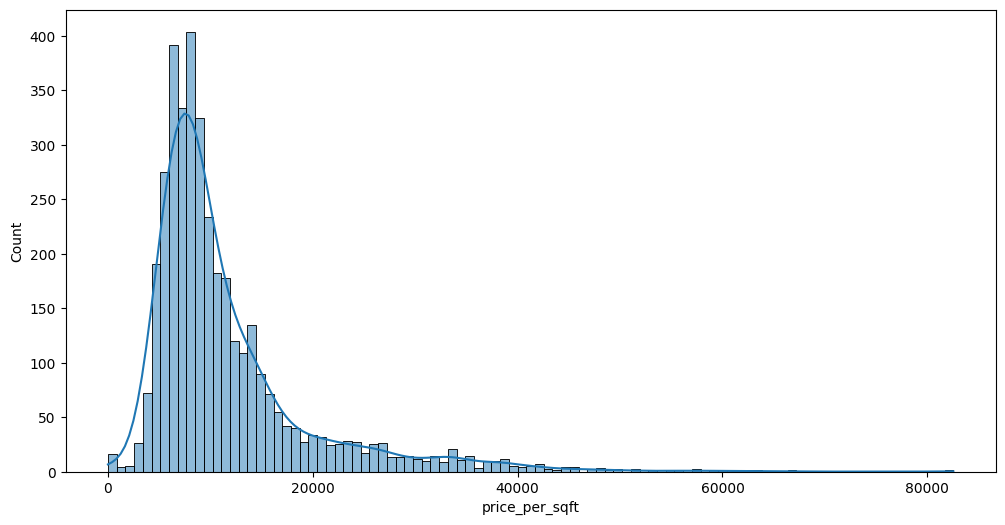

In [302]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x= 'price_per_sqft',kde=True)

In [303]:
df[df['price_per_sqft'] >= 45000] # I will consider these as outliers
df = df[df['price_per_sqft'] <= 45000]

<Axes: xlabel='price_per_sqft', ylabel='Count'>

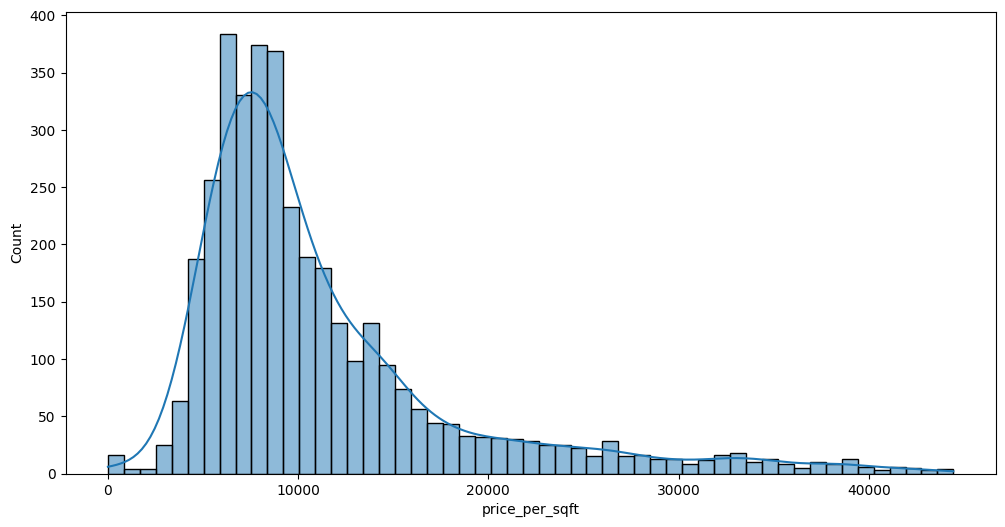

In [304]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x= 'price_per_sqft',kde=True)

<Axes: xlabel='price_per_sqft'>

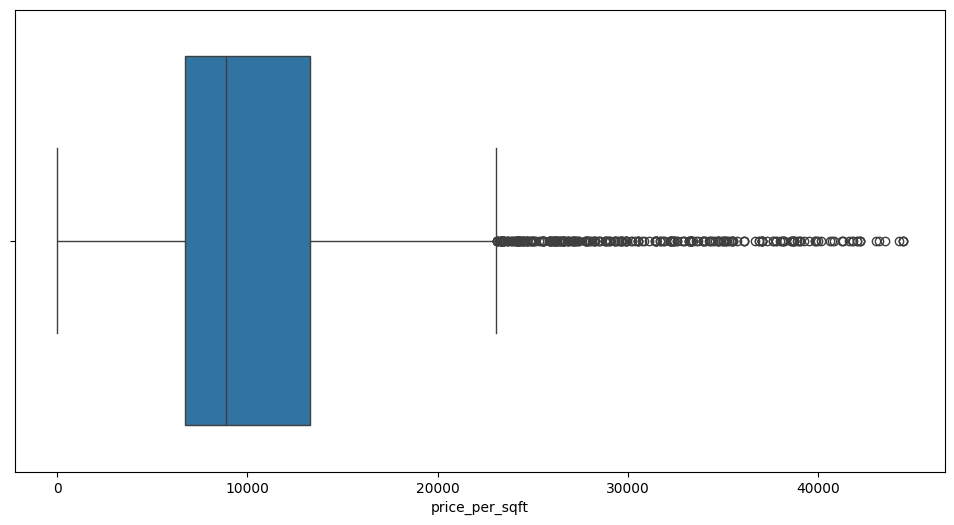

In [305]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x= 'price_per_sqft')

## Area

<Axes: xlabel='area', ylabel='Count'>

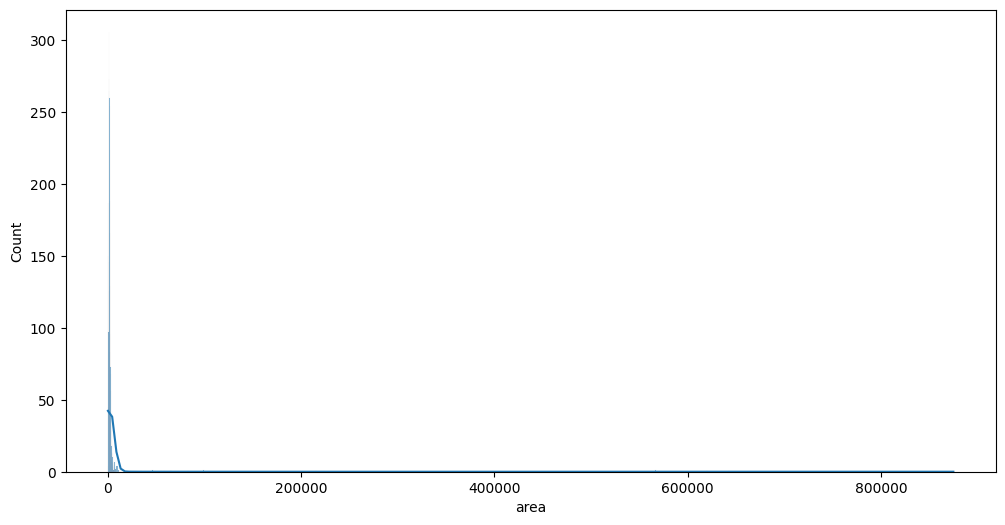

In [306]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x= 'area',kde=True)

In [307]:
df['area'].describe()

count      3759.000000
mean       2906.896781
std       22861.386118
min         145.000000
25%        1251.500000
50%        1744.000000
75%        2330.500000
max      875000.000000
Name: area, dtype: float64

In [308]:
df[df['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
252,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,...,NaN,737146.31648,NaN,0,0,0,0,0,2,44.0
612,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,...,NaN,NaN,607935.384490,1,0,0,0,1,1,65.0
1050,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,...,NaN,NaN,514395.478905,0,0,0,0,0,1,44.0
1923,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,...,NaN,NaN,569242.500799,0,0,0,0,0,1,76.0
2882,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,2.00000,NaN,1,1,0,1,1,0,0.0


In [309]:
df = df[df['area'] < 100000]

<Axes: xlabel='area', ylabel='Count'>

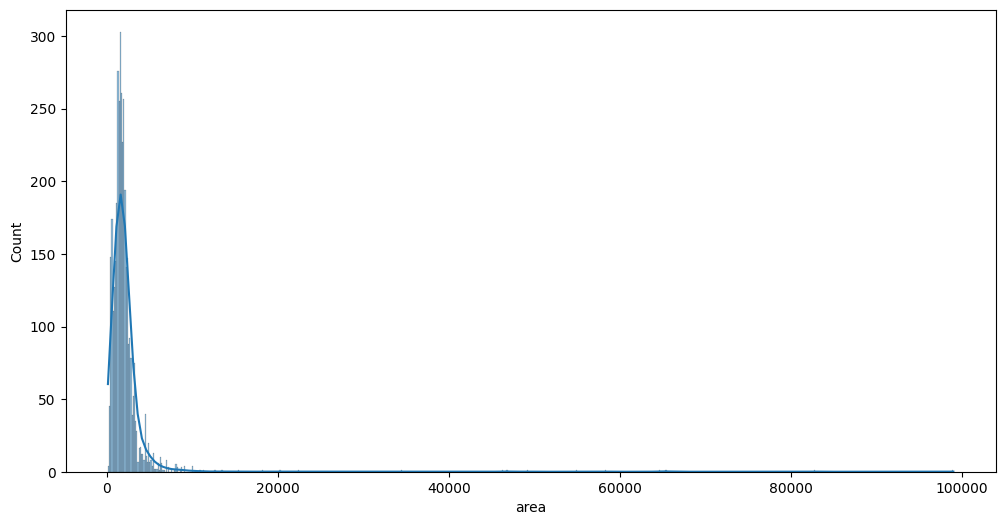

In [310]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x= 'area',kde=True)

In [359]:
df[df['area'] > 10000]
# 577, 956, 1124,1510, 1777, 1887, 2031, 2463, 2483, 3282, 3665

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
911,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,...,NaN,NaN,10999.952327,0,1,0,0,0,1,60.0
2542,house,independent,sohna road road,5.50,5093.0,10799.0,Plot area 1200(1003.35 sq.m.)Built Up area: 35...,3,3,3+,...,NaN,3500.0,NaN,1,1,0,1,1,1,49.0
2836,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,0,42.0
3286,flat,godrej icon,sector 88a,1.75,1384.0,12645.0,Carpet area: 1175.11,3,3,3+,...,NaN,NaN,1175.110000,0,0,0,0,0,1,55.0


In [341]:
df = df[df['area'] != 65261.0]

In [358]:
# List of indices to remove
indices_to_remove = [577, 956, 1124, 1510, 1777, 1887, 2031, 2463, 2483, 3282, 3665, 1558,2532, 550, 2350, 2355]
indi = [2990]
df = df.drop(indi)
df = df.reset_index(drop=True)

In [355]:
# Correcting the errors
df.loc[1503, 'area'] = 5800.0
df.loc[2773, 'area'] = 2850.0
df.loc[3016,'area'] = 2160.0
df.loc[1505,'area'] = 1926.0
df.loc[2777, 'area'] = 1935.0
df.loc[2991, 'area'] = 2152.0

<Axes: xlabel='area', ylabel='Count'>

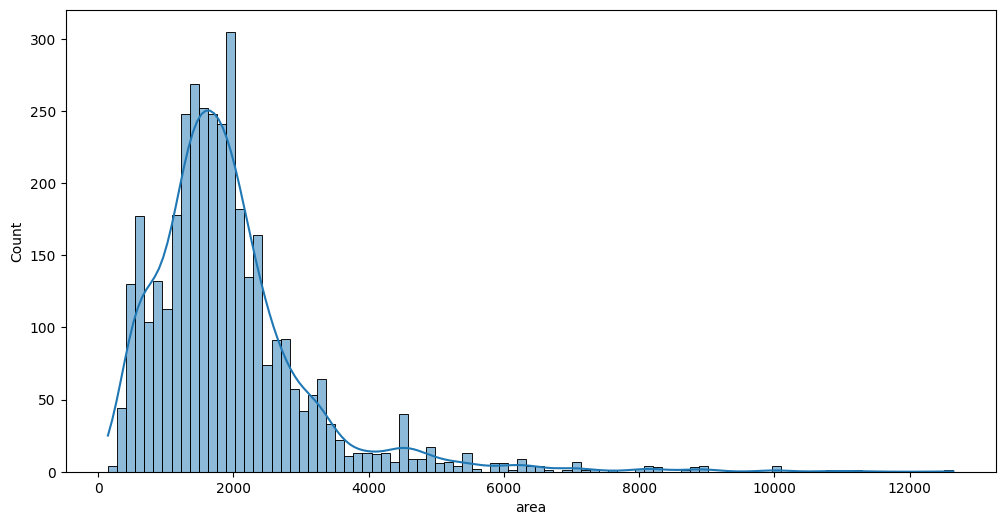

In [360]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x= 'area',kde=True)

<Axes: xlabel='area'>

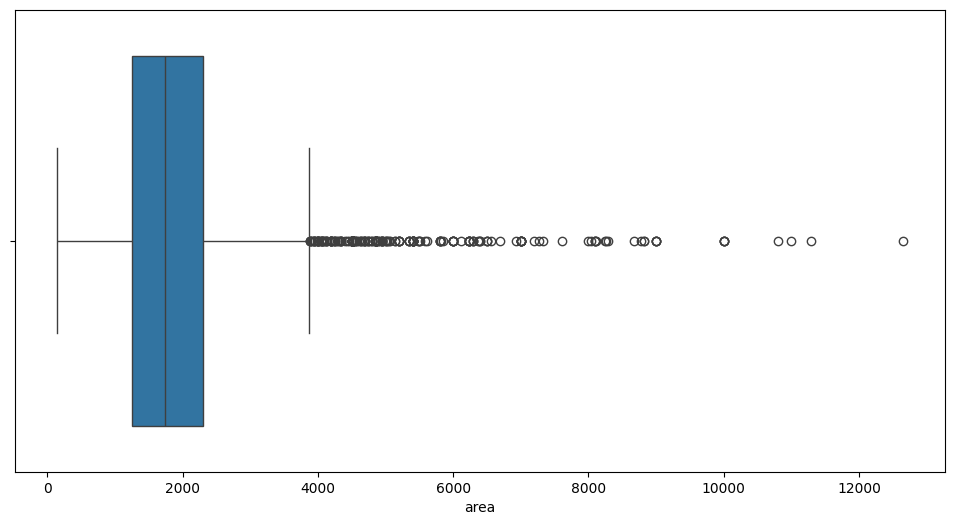

In [361]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x= 'area')

## Bedroom

<Axes: xlabel='bedRoom', ylabel='Count'>

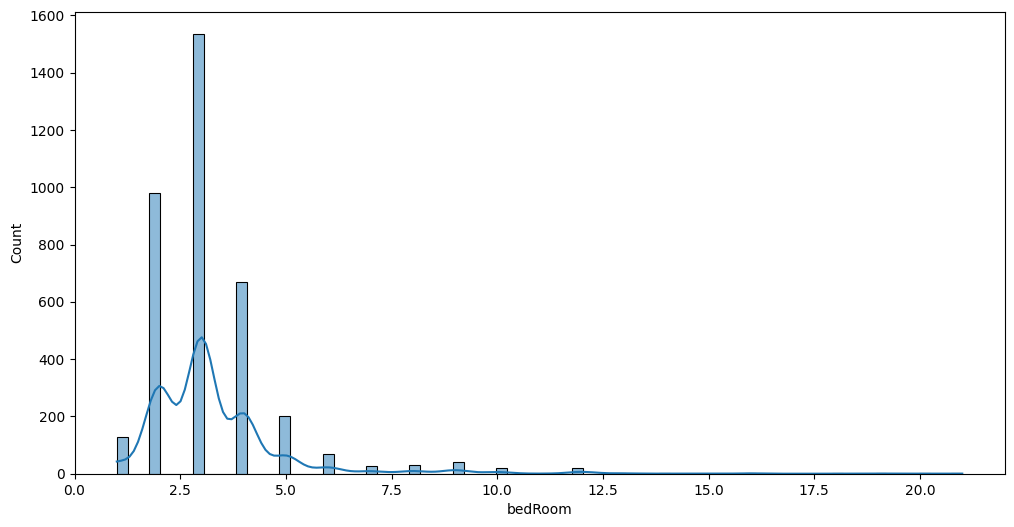

In [315]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x= 'bedRoom',kde=True)

<Axes: xlabel='bedRoom'>

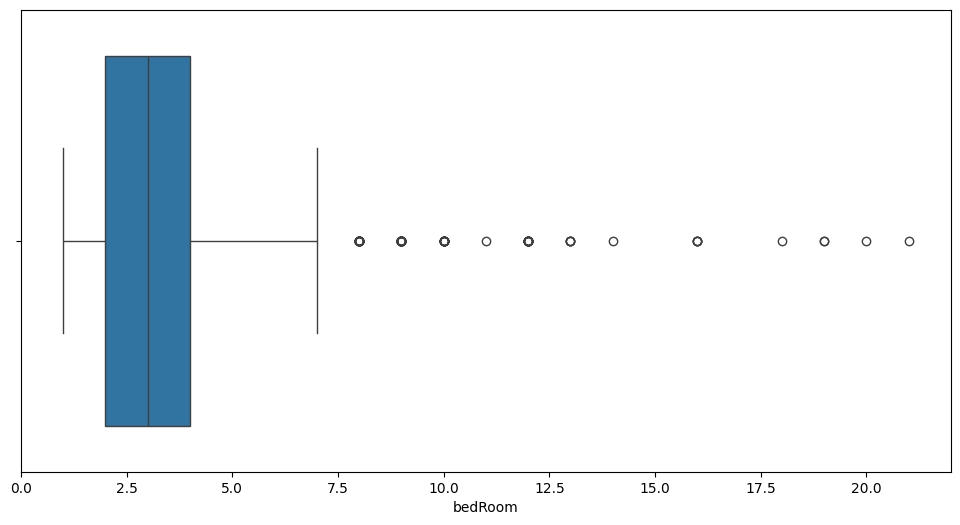

In [316]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x= 'bedRoom')

In [317]:
df['bedRoom'].describe()

count    3738.000000
mean        3.284109
std         1.729057
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [318]:
df = df[df['bedRoom'] <= 10]
df.shape

(3702, 23)

<Axes: xlabel='bedRoom', ylabel='Count'>

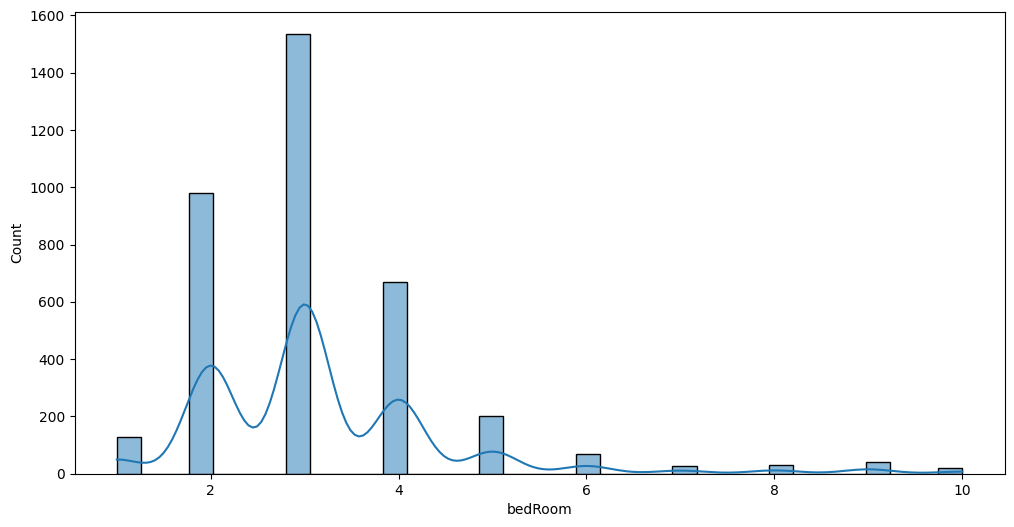

In [319]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x= 'bedRoom',kde=True)

## Bathroom

<Axes: xlabel='bathroom', ylabel='Count'>

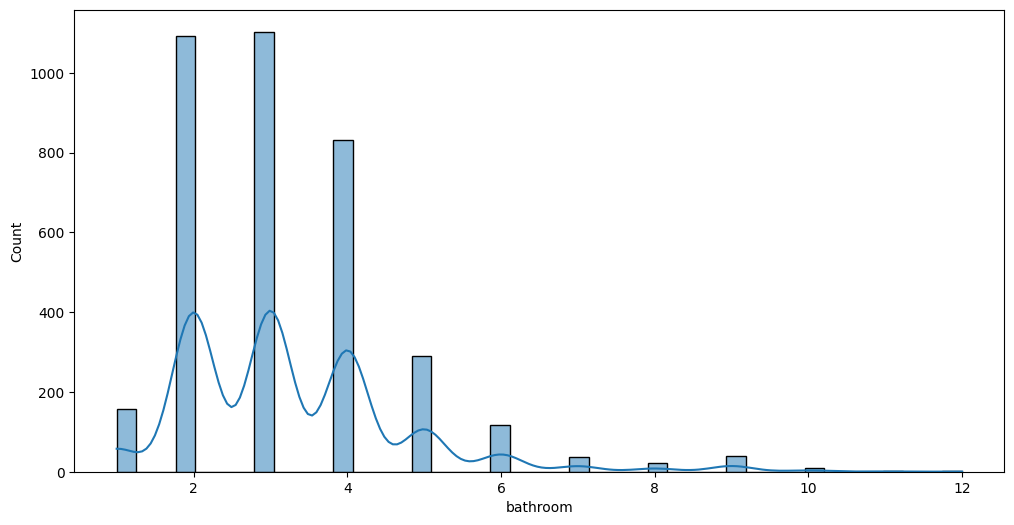

In [320]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x= 'bathroom',kde=True)

<Axes: xlabel='bathroom'>

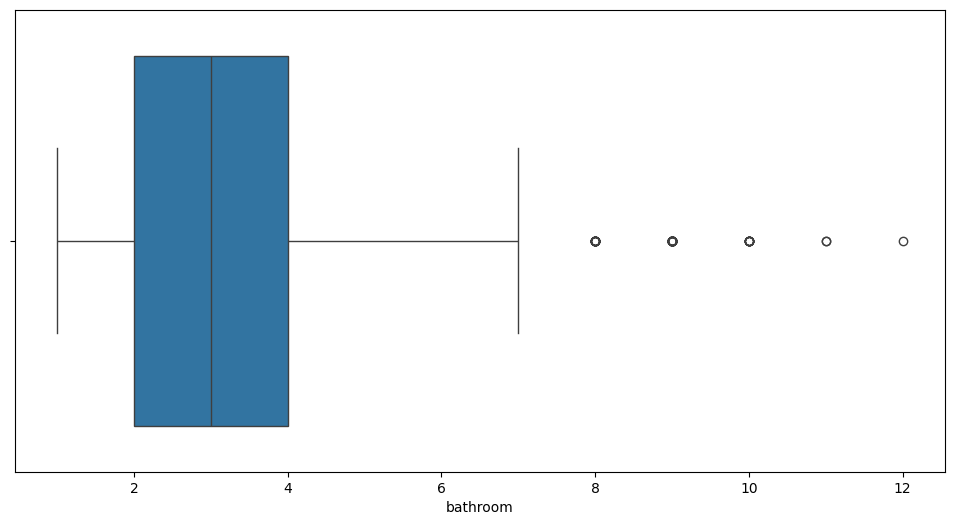

In [321]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x= 'bathroom')

In [322]:
df[df['bathroom'] > 10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
43,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,...,NaN,7000.000000,NaN,0,0,0,1,0,2,38.0
1019,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,...,NaN,5000.000000,NaN,1,1,0,1,1,0,39.0
2524,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,...,NaN,6389.989235,NaN,0,1,0,0,0,0,146.0


## Super Built Up area

<ipython-input-323-38afd364eb5f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

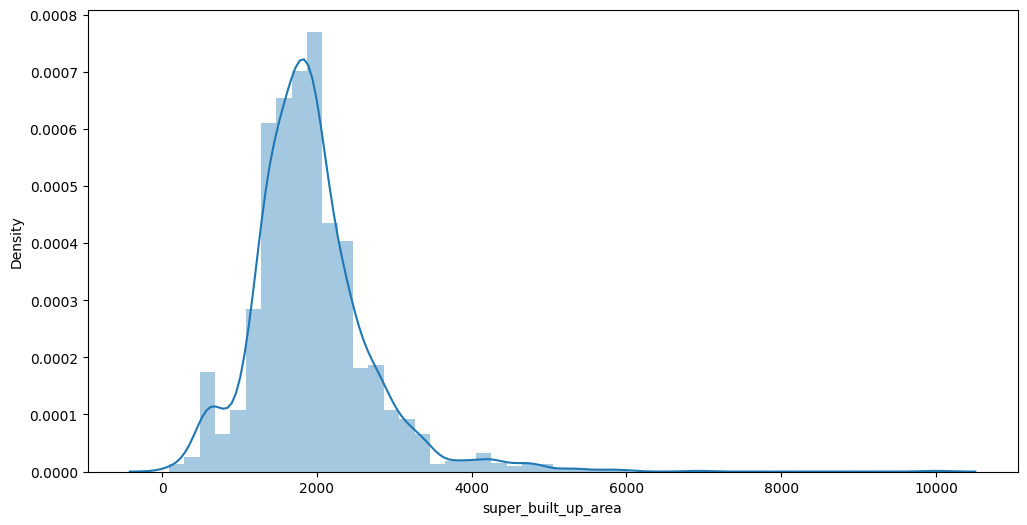

In [323]:
plt.figure(figsize=(12,6))
sns.distplot(df['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

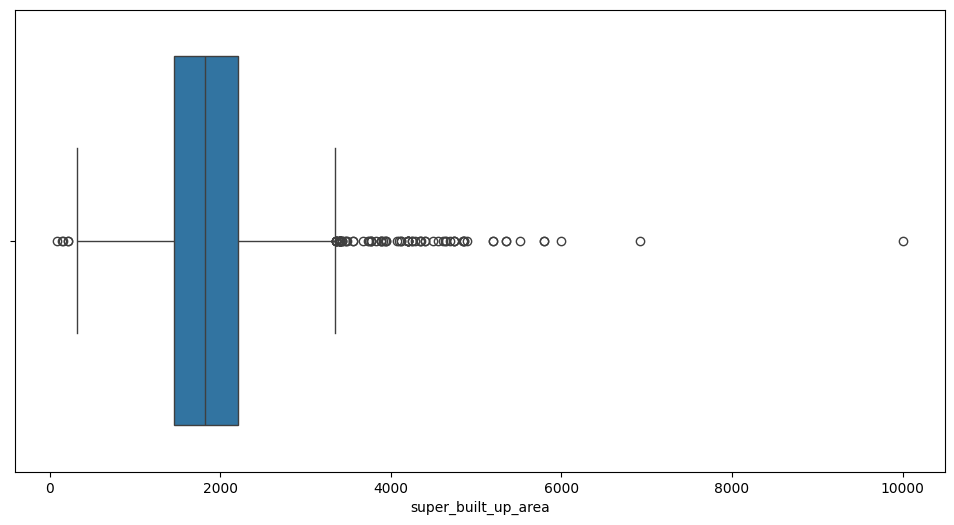

In [324]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x= 'super_built_up_area')

In [325]:
df[df['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
485,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,...,6926.0,NaN,NaN,0,1,0,0,0,0,140.0
1028,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,...,10000.0,NaN,NaN,0,1,0,1,1,1,49.0


## Built Up Area

<ipython-input-326-68313557bc2c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['built_up_area'])


<Axes: xlabel='built_up_area', ylabel='Density'>

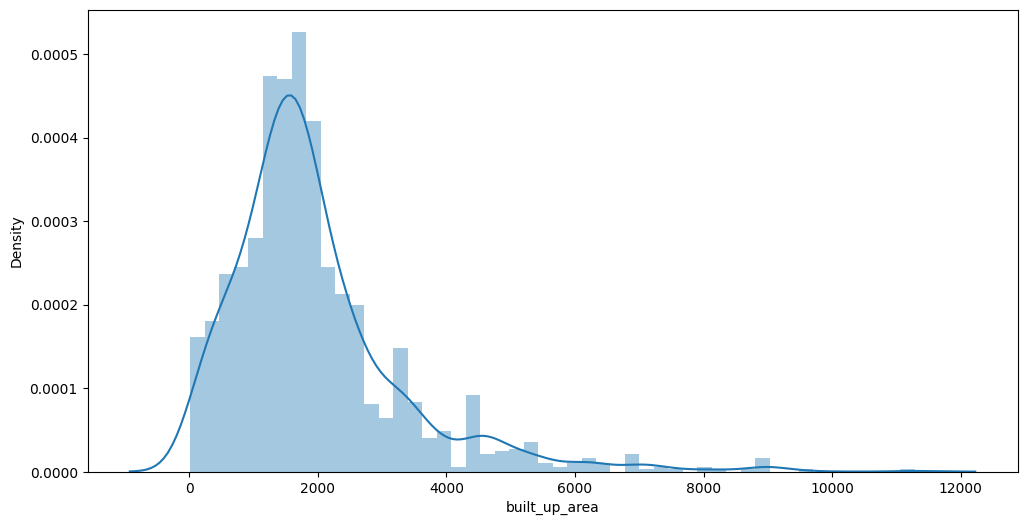

In [326]:
plt.figure(figsize=(12,6))
sns.distplot(df['built_up_area'])

<Axes: xlabel='built_up_area'>

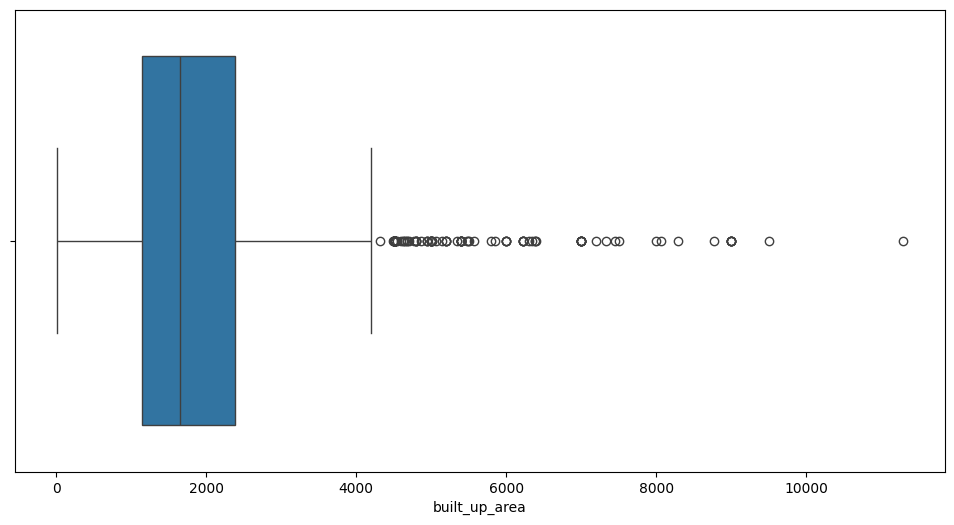

In [327]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x= 'built_up_area')

In [328]:
df[df['built_up_area'] > 10000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2864,house,independent,sector 43,27.5,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,0,42.0


## Carpet Area

<ipython-input-329-92081c422993>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

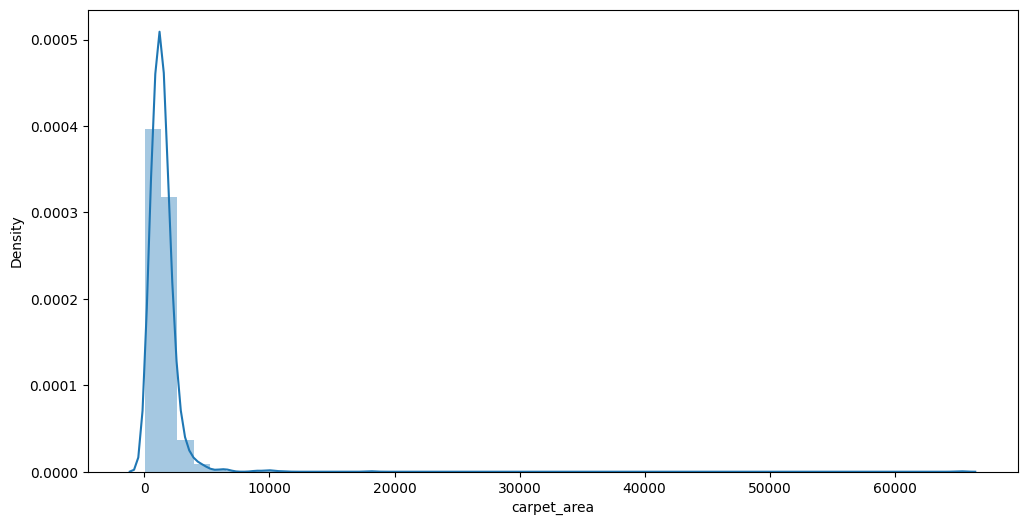

In [329]:
plt.figure(figsize=(12,6))
sns.distplot(df['carpet_area'])

In [330]:
df[df['carpet_area'] > 8000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
549,flat,godrej air,sector 85,2.50,1379.0,18129.0,Carpet area: 18122 (1683.59 sq.m.),4,5,3+,...,NaN,NaN,18121.994401,1,0,0,1,1,0,44.0
817,house,independent,sector 26,18.25,18250.0,10000.0,Plot area 550(51.1 sq.m.)Carpet area: 10000 sq...,7,9,3+,...,NaN,NaN,10000.000000,1,1,1,1,0,0,77.0
921,flat,m3m golfestate,sector 65,13.20,12000.0,11000.0,Carpet area: 11000 (1021.93 sq.m.),4,4,3,...,NaN,NaN,10999.952327,0,1,0,0,0,1,60.0
1417,house,independent,sector 25,10.00,37037.0,2700.0,Plot area 2700(250.84 sq.m.)Built Up area: 950...,5,5,3+,...,NaN,9500.0,9000.000000,0,1,0,1,0,2,29.0
2287,flat,the penthouses at the hibiscus,sector 50,8.50,8500.0,10000.0,Carpet area: 10000 (929.03 sq.m.),4,4,3,...,NaN,NaN,9999.986017,0,1,0,0,0,1,35.0
2355,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,...,NaN,NaN,65249.900688,0,0,0,0,0,1,0.0
2605,house,independent,sector 25,8.00,8000.0,10000.0,Carpet area: 10000 (929.03 sq.m.),3,9,2,...,NaN,NaN,9999.986017,0,0,0,0,0,1,0.0
2922,flat,the penthouses at the hibiscus,sector 50,8.00,8888.0,9001.0,Carpet area: 9000 (836.13 sq.m.),4,3,3,...,NaN,NaN,9000.019707,0,1,0,0,0,1,35.0


In [331]:
df.loc[1414,'carpet_area'] = 2690

In [332]:
df.loc[1444,'carpet_area'] = 1457

<ipython-input-333-92081c422993>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['carpet_area'])


<Axes: xlabel='carpet_area', ylabel='Density'>

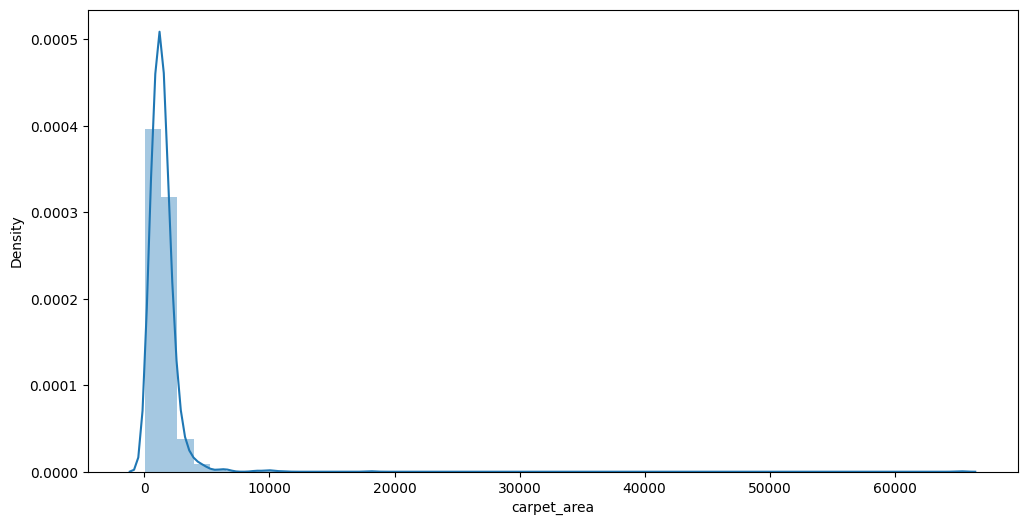

In [333]:
plt.figure(figsize=(12,6))
sns.distplot(df['carpet_area'])

<Axes: xlabel='carpet_area'>

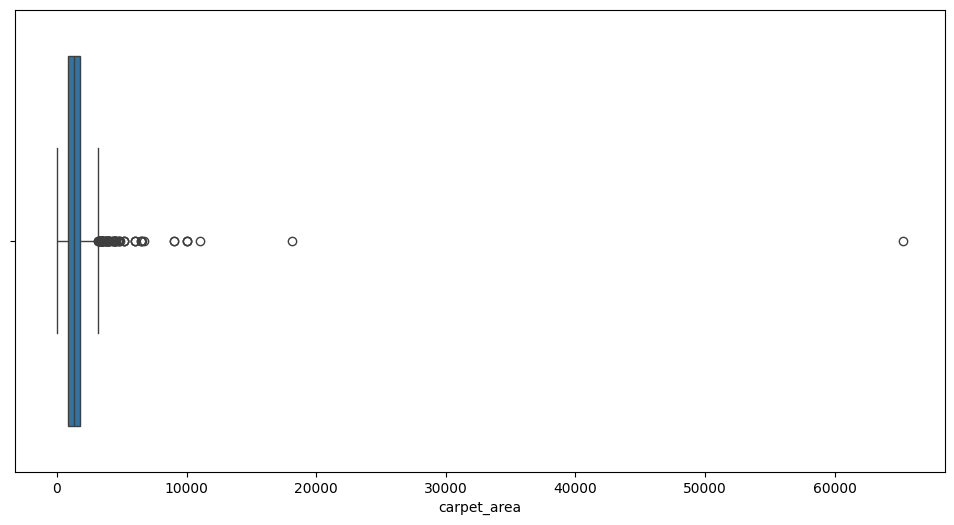

In [334]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x= 'carpet_area')

In [362]:
# uodating the price_per_sqft column as some changes were made to area
df['price_per_sqft'] = round((df['price']*10000000)/df['area'])

<ipython-input-363-553161677c7c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

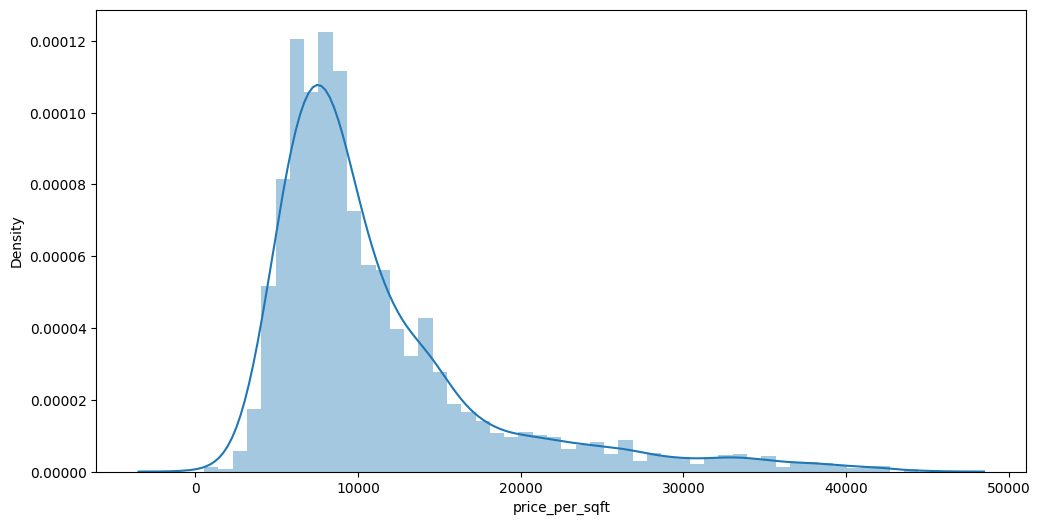

In [363]:
plt.figure(figsize=(12,6))
sns.distplot(df['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

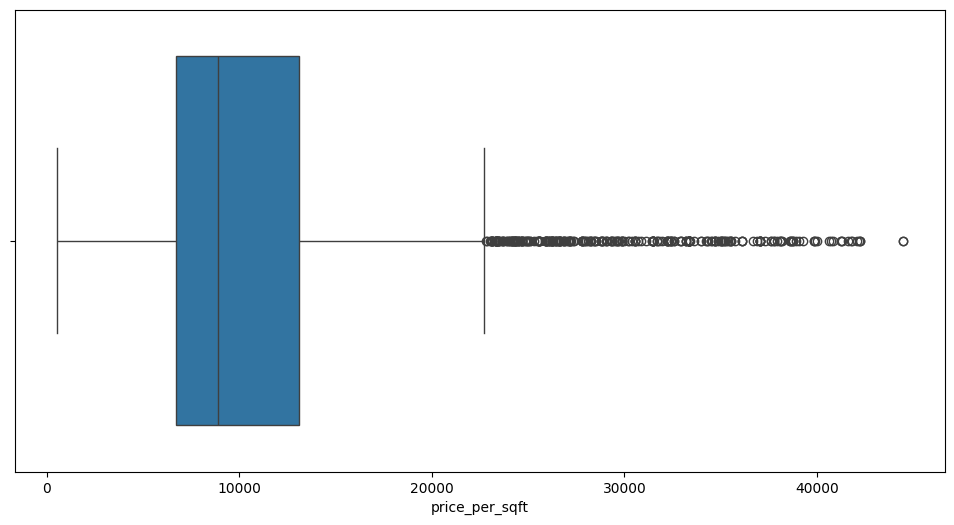

In [364]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x= 'price_per_sqft')

In [365]:
df[df['price_per_sqft'] > 42000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
255,house,independent,sector 43,9.5,42222.0,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 ...,5,5,3+,...,NaN,300.0,250.0,0,1,0,1,0,0,88.0
434,house,dlf city plots,sector 26,19.0,42054.0,4518.0,Plot area 502(419.74 sq.m.),6,6,3,...,NaN,4518.0,NaN,1,1,0,0,0,0,121.0
1023,house,independent,sector 26,19.0,42222.0,4500.0,Plot area 500(418.06 sq.m.),6,8,3+,...,NaN,4500.0,NaN,1,1,1,1,0,0,103.0
2191,house,independent,sector 55,5.0,44444.0,1125.0,Plot area 125(104.52 sq.m.)Built Up area: 115 ...,9,9,3+,...,NaN,115.0,100.0,0,0,0,0,1,0,44.0
2818,house,independent,sector 26,20.0,44444.0,4500.0,Plot area 500(418.06 sq.m.),5,7,3+,...,NaN,4500.0,NaN,0,1,0,1,0,2,97.0
3333,house,independent,sector 28,12.0,42194.0,2844.0,Plot area 316(264.22 sq.m.),4,5,3+,...,NaN,2844.0,NaN,0,1,1,1,0,0,60.0


In [371]:
x = df[df['price'] <= 20000]
(x['area']/x['bedRoom']).quantile(0.05) #-> In this data only 2% values are there whose x['area']/x['bedRoom'] is
# lesser than this value - 180.0

248.1119047619048

In [376]:
df['area_bedroom_ratio'] = df['area']/df['bedRoom']

In [377]:
temp_rat = df[(df['area']/df['bedRoom'])<248.1]
temp_rat.to_csv("temp.csv")

In [379]:
temp_rat

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_bedroom_ratio
32,house,independent,sector 7,0.2700,12000.0,225.0,Plot area 225(20.9 sq.m.),2,2,1,...,225.000000,NaN,0,0,0,0,0,1,12.0,112.500000
58,flat,conscient habitat,sector 99a,0.2710,5599.0,484.0,Carpet area: 484 (44.97 sq.m.),2,2,1,...,NaN,484.052583,0,0,0,0,1,1,49.0,242.000000
67,house,independent,sector 4,0.4675,10601.0,441.0,Plot area 49(40.97 sq.m.)Built Up area: 50 sq....,2,2,1,...,50.000000,48.000000,1,0,0,0,0,0,73.0,220.500000
73,flat,signature global solera,sector 107,0.2775,5675.0,489.0,Carpet area: 489 (45.43 sq.m.),2,2,2,...,NaN,489.003977,0,0,0,0,0,1,29.0,244.500000
100,house,independent,sector 43,5.3000,27390.0,1935.0,Plot area 215(179.77 sq.m.),9,9,3+,...,1935.000000,NaN,0,1,0,0,0,0,71.0,215.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3636,house,independent,sector 12,0.6500,6500.0,1000.0,Carpet area: 1000 (92.9 sq.m.),6,2,3,...,NaN,999.966310,0,0,0,0,0,1,37.0,166.666667
3638,house,iffco nagar and 17b rwa,sector 17,2.9800,20566.0,1449.0,Plot area 161(134.62 sq.m.),6,6,3+,...,1449.000000,NaN,1,0,0,1,0,1,85.0,241.500000
3668,house,independent,sector 12,2.5000,13889.0,1800.0,Plot area 1800(167.23 sq.m.),9,5,2,...,1800.000000,NaN,0,0,0,1,0,1,88.0,200.000000
3678,house,independent,sector 47,4.3000,29312.0,1467.0,Plot area 163(136.29 sq.m.),6,4,2,...,1467.000000,NaN,0,0,0,0,1,1,0.0,244.500000


In [ ]:
# the more the ratio -> the better
# the lesser -> more rooms built in small area

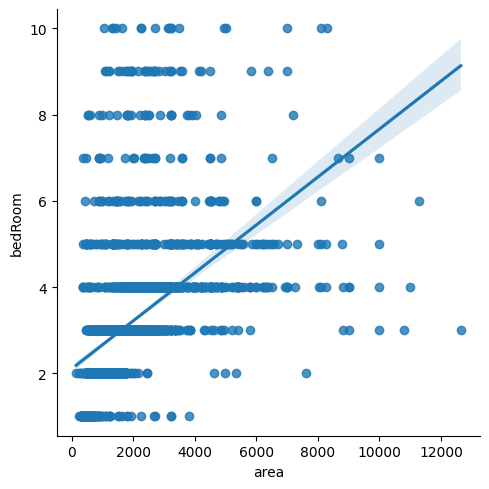

In [380]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [382]:
df = df[df['area_bedroom_ratio'] > 100]

In [383]:
outliers_df = df[(df['area_bedroom_ratio'] < 250) & (df['bedRoom'] > 3)]

In [384]:
# transformation - number of bedrooms/number of floors
# assuming that the house is multistoreyed and the bedrooms are total rooms taking into consideration the whole house
outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])

<ipython-input-384-97d10b05127b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['bedRoom'] = round(outliers_df['bedRoom']/outliers_df['floorNum'])


In [385]:
df.update(outliers_df)

In [387]:
df['area_bedroom_ratio'] = df['area']/df['bedRoom']

<ipython-input-387-ddf679fd4512>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_bedroom_ratio'] = df['area']/df['bedRoom']


In [389]:
df = df[~((df['area_bedroom_ratio'] < 250) & (df['bedRoom'] > 4))]

In [390]:
df.shape

(3665, 24)

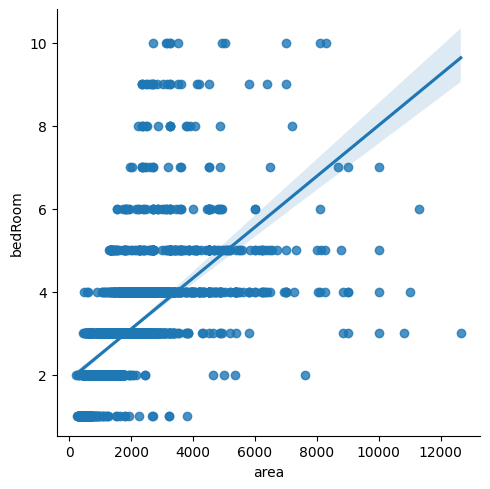

In [391]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [392]:
df.to_csv("gurgaon_properties_cleaned_and_outliers_treated.csv")